# Procesamiento y visualizacion - Kevin Chevez Coronel

## Lectura de CSV y transformacion

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure

# Funcion para imprimir diccionario
def imprimirDiccionario(dic, titulo):
    print(f"----------------- {titulo} -----------------")
    for clave,valor in dic.items():
        print(f"{clave}: {valor}")

# Lectura del archivo
dataFrame = pd.read_csv("dataset-kchevez.csv", encoding='utf8')
dictCiudades = {}
dictHabilidadesDuras = {}
for linea in dataFrame.itertuples():
    # print(linea.ciudades)
    ciudades = linea.ciudades.strip().split(";")
    for ciudad in ciudades:
        if(ciudad not in dictCiudades):
            dictCiudades[ciudad] = 1
        else:
            dictCiudades[ciudad] += 1

    habilidadesDuras = linea.habilidades.strip().split(";")
    for habilidad in habilidadesDuras:
        if(habilidad not in dictHabilidadesDuras):
            dictHabilidadesDuras[habilidad] = 1
        else:
            dictHabilidadesDuras[habilidad] += 1

### Print de diccionario creado para ciudades

In [190]:
print("Diccionario ciudades final: ")
imprimirDiccionario(dictCiudades, "Tabla de frecuencia de ciudades")

Diccionario ciudades final: 
----------------- Tabla de frecuencia de ciudades -----------------
Dearborn: 1
Palo Alto: 1
Detroit: 1
Berlin: 8
Boulder: 2
Toronto: 4
Córdoba: 1
Villa Allende: 1
București: 1
Cluj-Napoca: 1
Santa Ana: 1
Reston: 1
Beograd: 1
Valbonne: 1
Lausanne: 2
Sint-Gillis: 1
Brussel: 1
Gent: 1
Bangalore: 1
Malmö: 1
Folsom: 1
Sofia: 3
Bucharest: 2
California: 1
Bend: 1
Orlando: 1
Cambridge: 3
Pittsburgh: 1
Paris: 1
London: 10
Barcelona: 1
Augusta: 1
San Antonio: 2
Denver: 2
München: 6
Enschede: 1
Tel Aviv-Yafo: 1
Hamburg: 1
Tunis: 1
Frankfurt am Main: 2
Bengaluru: 5
Singapore: 1
Petaling Jaya: 1
No office location: 5
Bad Nauheim: 1
Mountain View: 2
Chicago: 5
Riverwoods: 1
Ataşehir: 1
Sarajevo: 1
Irvine: 1
Plano: 1
Washington: 1
Tucson: 1
Austin: 3
Warner Robins: 1
Denmark: 1
Plainsboro Township: 1
Poland: 1
Kaunas: 1
Amsterdam: 8
Aberdeen: 1
Brighton: 1
Sunrise: 1
Düsseldorf: 2
Atlanta: 1
Auburn: 1
Newark: 1
Seattle: 4
Hyderabad: 1
Budapest: 1
San Jose: 1
Kleinmachnow

### Print de diccionario creado para habilidades duras

In [191]:
print("Diccionario habilidades duras final: ")
imprimirDiccionario(dictHabilidadesDuras, "Tabla de frecuencia de Habilidades duras")

Diccionario habilidades duras final: 
----------------- Tabla de frecuencia de Habilidades duras -----------------
python: 74
user-experience: 2
java: 98
frontend: 3
agile-project-management: 1
rally: 1
agile: 10
node.js: 43
c++: 33
shell: 4
javascript: 95
scrum: 13
ruby: 15
html: 14
c#: 57
linux: 15
css: 16
xml: 4
.net: 44
backend: 5
c: 21
sql: 37
database: 3
web-applications: 1
git: 21
programming: 1
web-services: 2
web-development-server: 1
html5: 9
golang: 13
aws: 11
reactjs: 46
docker: 39
kubernetes: 47
apache-kafka: 17
rabbitmq: 10
apache-spark: 8
kotlin: 36
swift: 32
terraform: 15
databricks: 2
airflow: 3
snowflake-cloud-data-plat: 6
php: 21
ruby-on-rails: 8
react-native: 15
angular: 31
vue.js: 19
amazon-web-services: 43
azure: 31
selenium: 6
mysql: 18
postman: 4
jmeter: 1
net: 4
.net-core: 7
mongodb: 25
rest: 12
typescript: 42
nosql: 5
rust: 9
perl: 3
go: 25
r: 8
jenkins: 15
cucumber: 7
google-cloud-platform: 9
android: 34
ios: 27
embedded: 3
autosar: 1
ethernet: 1
aspice: 1
am

## Creacion de primer diagrama -  Pareto

Este diagrama ayuda a responder: ¿Cuáles las habilidades duras requeridas por las empresas registradas en StackOverflow que más relevancia tienen?
Generando como respuesta que las habilidades duras más relevantes son:

- java
- javascript
- python
- c#
- kubernetes
- reactjs
- .net
- node.js
- amazon-web-services
- typescript
- docker
- sql
- kotlin
- android
- c++
- swift
- angular

### Creacion del Dataframe (tabla) para identificar las frecuencias de habilidades duras

In [192]:
dataFrameHabilidades = pd.DataFrame(list(dictHabilidadesDuras.items()))
dataFrameHabilidades.columns = ["HABILIDAD", "FRECUENCIA"]
dataFrameHabilidadesSorted = dataFrameHabilidades.drop_duplicates().sort_values(by="FRECUENCIA", ascending=False)
dataFrameHabilidadesSorted.index = dataFrameHabilidadesSorted["HABILIDAD"]
del dataFrameHabilidadesSorted["HABILIDAD"]
dataFrameHabilidadesSorted.head(15)

FRECUENCIA
HABILIDAD                      
java                         98
javascript                   95
python                       74
c#                           57
kubernetes                   47
reactjs                      46
.net                         44
node.js                      43
amazon-web-services          43
typescript                   42
docker                       39
sql                          37
kotlin                       36
android                      34
c++                          33

### Diagrama de Pareto - Completo 

C:\Users\KevinChC\AppData\Local\Temp\ipykernel_1260\255060271.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataFrameHabilidadesSorted.index, rotation=90, ha='right')


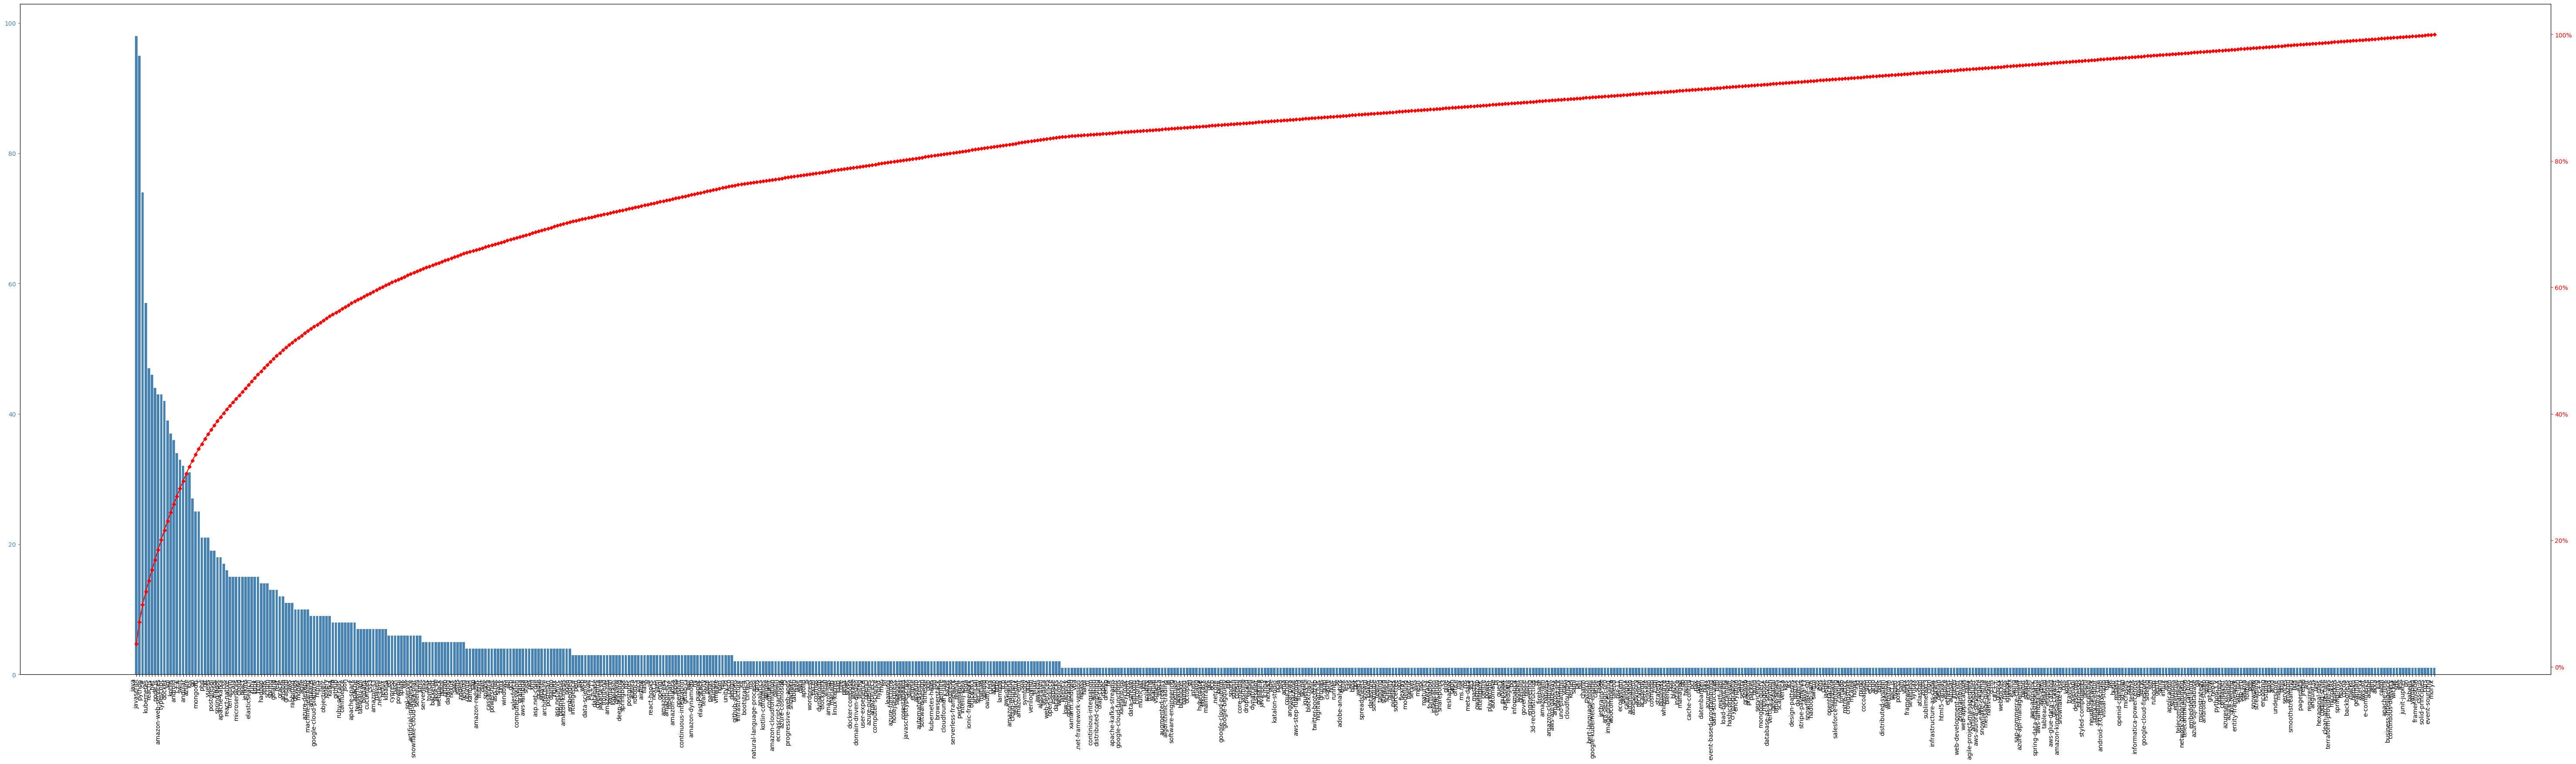

In [193]:
dataFrameHabilidadesSorted['CUMULATIVE_PERCENT'] = dataFrameHabilidadesSorted['FRECUENCIA'].cumsum()/dataFrameHabilidadesSorted['FRECUENCIA'].sum()*100
# Definción de los estilos de la gráfica
color1 = 'steelblue'
color2 = 'red'
line_size = 4

# Creando un barplot básico para la base de la gráfica de pareto.
fig, ax = plt.subplots()
fig.set_figwidth(75)
fig.set_figheight(20)
ax.bar(dataFrameHabilidadesSorted.index, dataFrameHabilidadesSorted['FRECUENCIA'], color=color1)
ax.autoscale(enable=True) 
ax.set_xticklabels(dataFrameHabilidadesSorted.index, rotation=90, ha='right')

# Agredando la columna de porcentaje acomulativo al plot
ax2 = ax.twinx()
ax2.autoscale(enable=True) 
ax2.plot(dataFrameHabilidadesSorted.index, dataFrameHabilidadesSorted['CUMULATIVE_PERCENT'], color=color2,  marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Especificando los colores de los ejes.
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# Mostrando el diagrama de Pareto completo
plt.show()


### Diagrama de Pareto - Limitado a 35 valores

C:\Users\KevinChC\AppData\Local\Temp\ipykernel_1260\1920444501.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataFrameHabilidadesSorted.index, rotation=90, ha='right')


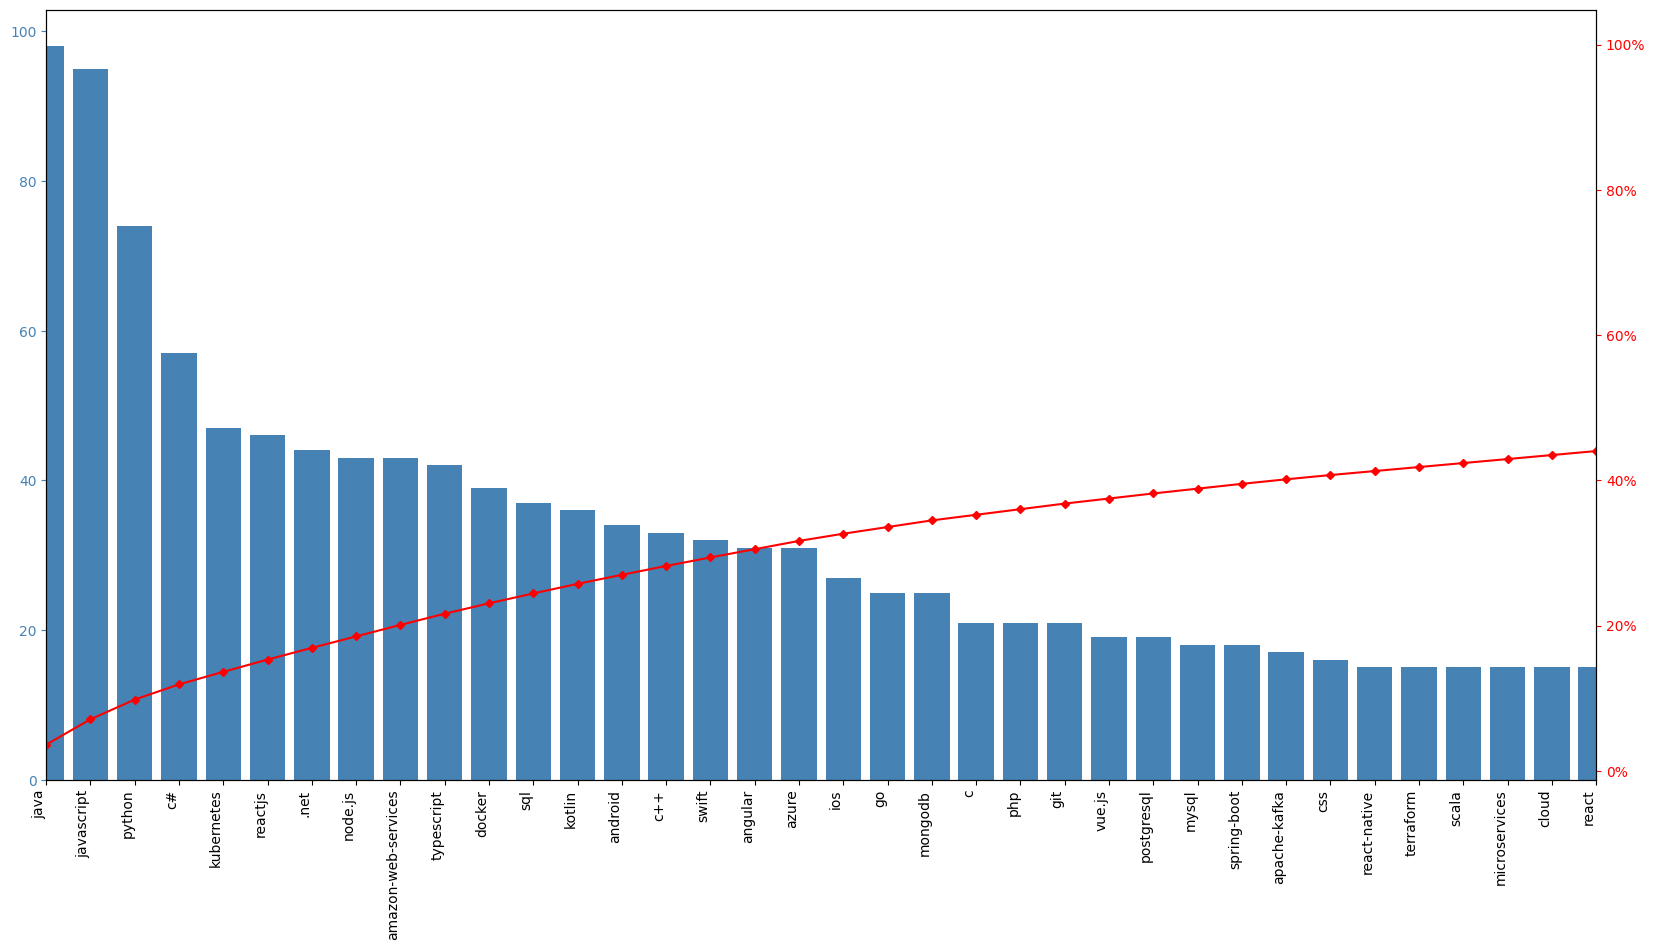

In [194]:
dataFrameHabilidadesSorted['CUMULATIVE_PERCENT'] = dataFrameHabilidadesSorted['FRECUENCIA'].cumsum()/dataFrameHabilidadesSorted['FRECUENCIA'].sum()*100
# Definción de los estilos de la gráfica
color1 = 'steelblue'
color2 = 'red'
line_size = 4

# Creando un barplot básico para la base de la gráfica de pareto.
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
ax.bar(dataFrameHabilidadesSorted.index, dataFrameHabilidadesSorted['FRECUENCIA'], color=color1)
ax.set_xticklabels(dataFrameHabilidadesSorted.index, rotation=90, ha='right')

# Agredando la columna de porcentaje acomulativo al plot
ax2 = ax.twinx()
ax2.autoscale(enable=True) 
ax2.plot(dataFrameHabilidadesSorted.index, dataFrameHabilidadesSorted['CUMULATIVE_PERCENT'], color=color2,  marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Especificando los colores de los ejes.
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# Mostrando el diagrama de Pareto limitado
plt.xlim(0, 35)
plt.show()

## Creacion del segundo diagrama - Diagrama de lineas

Este diagrama ayuda a responder: ¿Cuáles son las 5 habilidades duras que menos se solicitan en las empresas registradas en StackOverflow?
Generando como respuesta que las 5 habilidades duras menos relevantes son:

1. marko
2. neo4j
3. git-flow
4. soap
5. android-studio

### Creacion del Dataframe (tabla) para identificar las frecuencias de habilidades duras - Invertido

In [195]:
dataFrameHabilidades = pd.DataFrame(list(dictHabilidadesDuras.items()))
dataFrameHabilidades.columns = ["HABILIDAD", "FRECUENCIA"]
dataFrameHabilidadesSorted = dataFrameHabilidades.drop_duplicates().sort_values(by="FRECUENCIA", ascending=True)
dataFrameHabilidadesSorted.index = dataFrameHabilidadesSorted["HABILIDAD"]
del dataFrameHabilidadesSorted["HABILIDAD"]
dataFrameHabilidadesSorted.head(15)

FRECUENCIA
HABILIDAD                      
marko                         1
neo4j                         1
git-flow                      1
soap                          1
android-studio                1
microstrategy                 1
qa                            1
azure-sql-database            1
python-3.x                    1
embedded-linux                1
telecommunication             1
network-programming           1
telecom-manager               1
enterprise                    1
solutions                     1

### Diagrama de lineas - Completo 

In [196]:
# Crear el gráfico
fig, ax = plt.subplots()
fig.set_figwidth(75)
fig.set_figheight(20)
ax.plot(dataFrameHabilidadesSorted.index, dataFrameHabilidadesSorted['FRECUENCIA'])

# Rotar las etiquetas del eje x a 90 grados
ax.set_xticklabels(dataFrameHabilidadesSorted.index, rotation=90, ha='right')

# Estableciendo etiquetas
plt.title('Diagrama de lineas - Ranking invertido de las habilidades duras menos mencionadas.')
plt.xlabel('Habilidades duras')
plt.ylabel('Frecuenia')

# Mostrando el gráfico
plt.show()

C:\Users\KevinChC\AppData\Local\Temp\ipykernel_1260\2670740900.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataFrameHabilidadesSorted.index, rotation=90, ha='right')


### Diagrama de Lineas - Limitado a 35 valores

C:\Users\KevinChC\AppData\Local\Temp\ipykernel_1260\756585529.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataFrameHabilidadesSorted.index, rotation=90, ha='right')


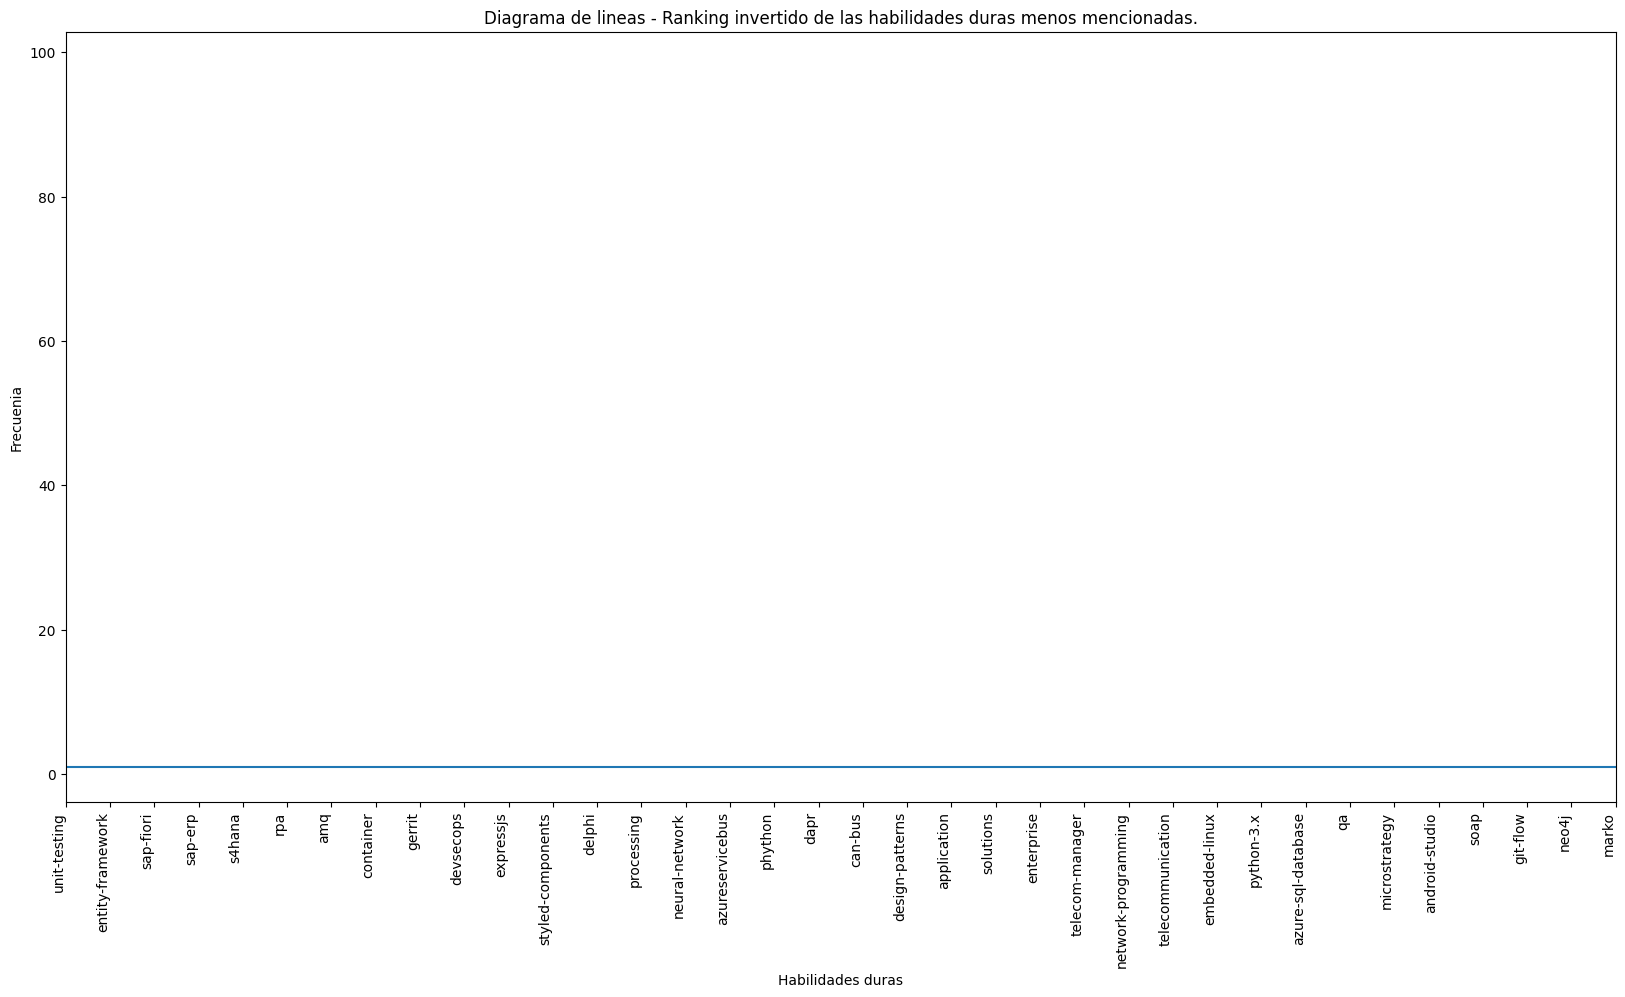

In [197]:
# Crear el gráfico
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
ax.plot(dataFrameHabilidadesSorted.index, dataFrameHabilidadesSorted['FRECUENCIA'])

# Rotar las etiquetas del eje x a 90 grados
ax.set_xticklabels(dataFrameHabilidadesSorted.index, rotation=90, ha='right')

# Estableciendo etiquetas
plt.title('Diagrama de lineas - Ranking invertido de las habilidades duras menos mencionadas.')
plt.xlabel('Habilidades duras')
plt.ylabel('Frecuenia')

# Mostrando el gráfico
ax.set_xlim(35, 0)
plt.show()

## Creacion del tercer diagrama - Diagrama de Donas

Este diagrama ayuda a responder: ¿Cuál es el porcentaje de las ciudades que aparecen en las empresas registradas en StackOverflow? 
Generando como lo siguiente:

### Creacion del Dataframe (tabla) para identificar las frecuencias de ciudades

In [198]:
# DIAGRAMA DE PIE
dataFrameCiudades = pd.DataFrame(list(dictCiudades.items()))
dataFrameCiudades.columns = ["CIUDAD", "FRECUENCIA"]
dataFrameCiudades['PORTION_PERCENT'] = dataFrameCiudades['FRECUENCIA']/dataFrameCiudades['FRECUENCIA'].sum()*100
dataFrameCiudades.index = dataFrameCiudades["CIUDAD"]
del dataFrameCiudades["CIUDAD"]
dataFrameCiudades.head(15)

FRECUENCIA  PORTION_PERCENT
CIUDAD                                    
Dearborn                1         0.425532
Palo Alto               1         0.425532
Detroit                 1         0.425532
Berlin                  8         3.404255
Boulder                 2         0.851064
Toronto                 4         1.702128
Córdoba                 1         0.425532
Villa Allende           1         0.425532
București               1         0.425532
Cluj-Napoca             1         0.425532
Santa Ana               1         0.425532
Reston                  1         0.425532
Beograd                 1         0.425532
Valbonne                1         0.425532
Lausanne                2         0.851064

### Diagrama de donas - Completo

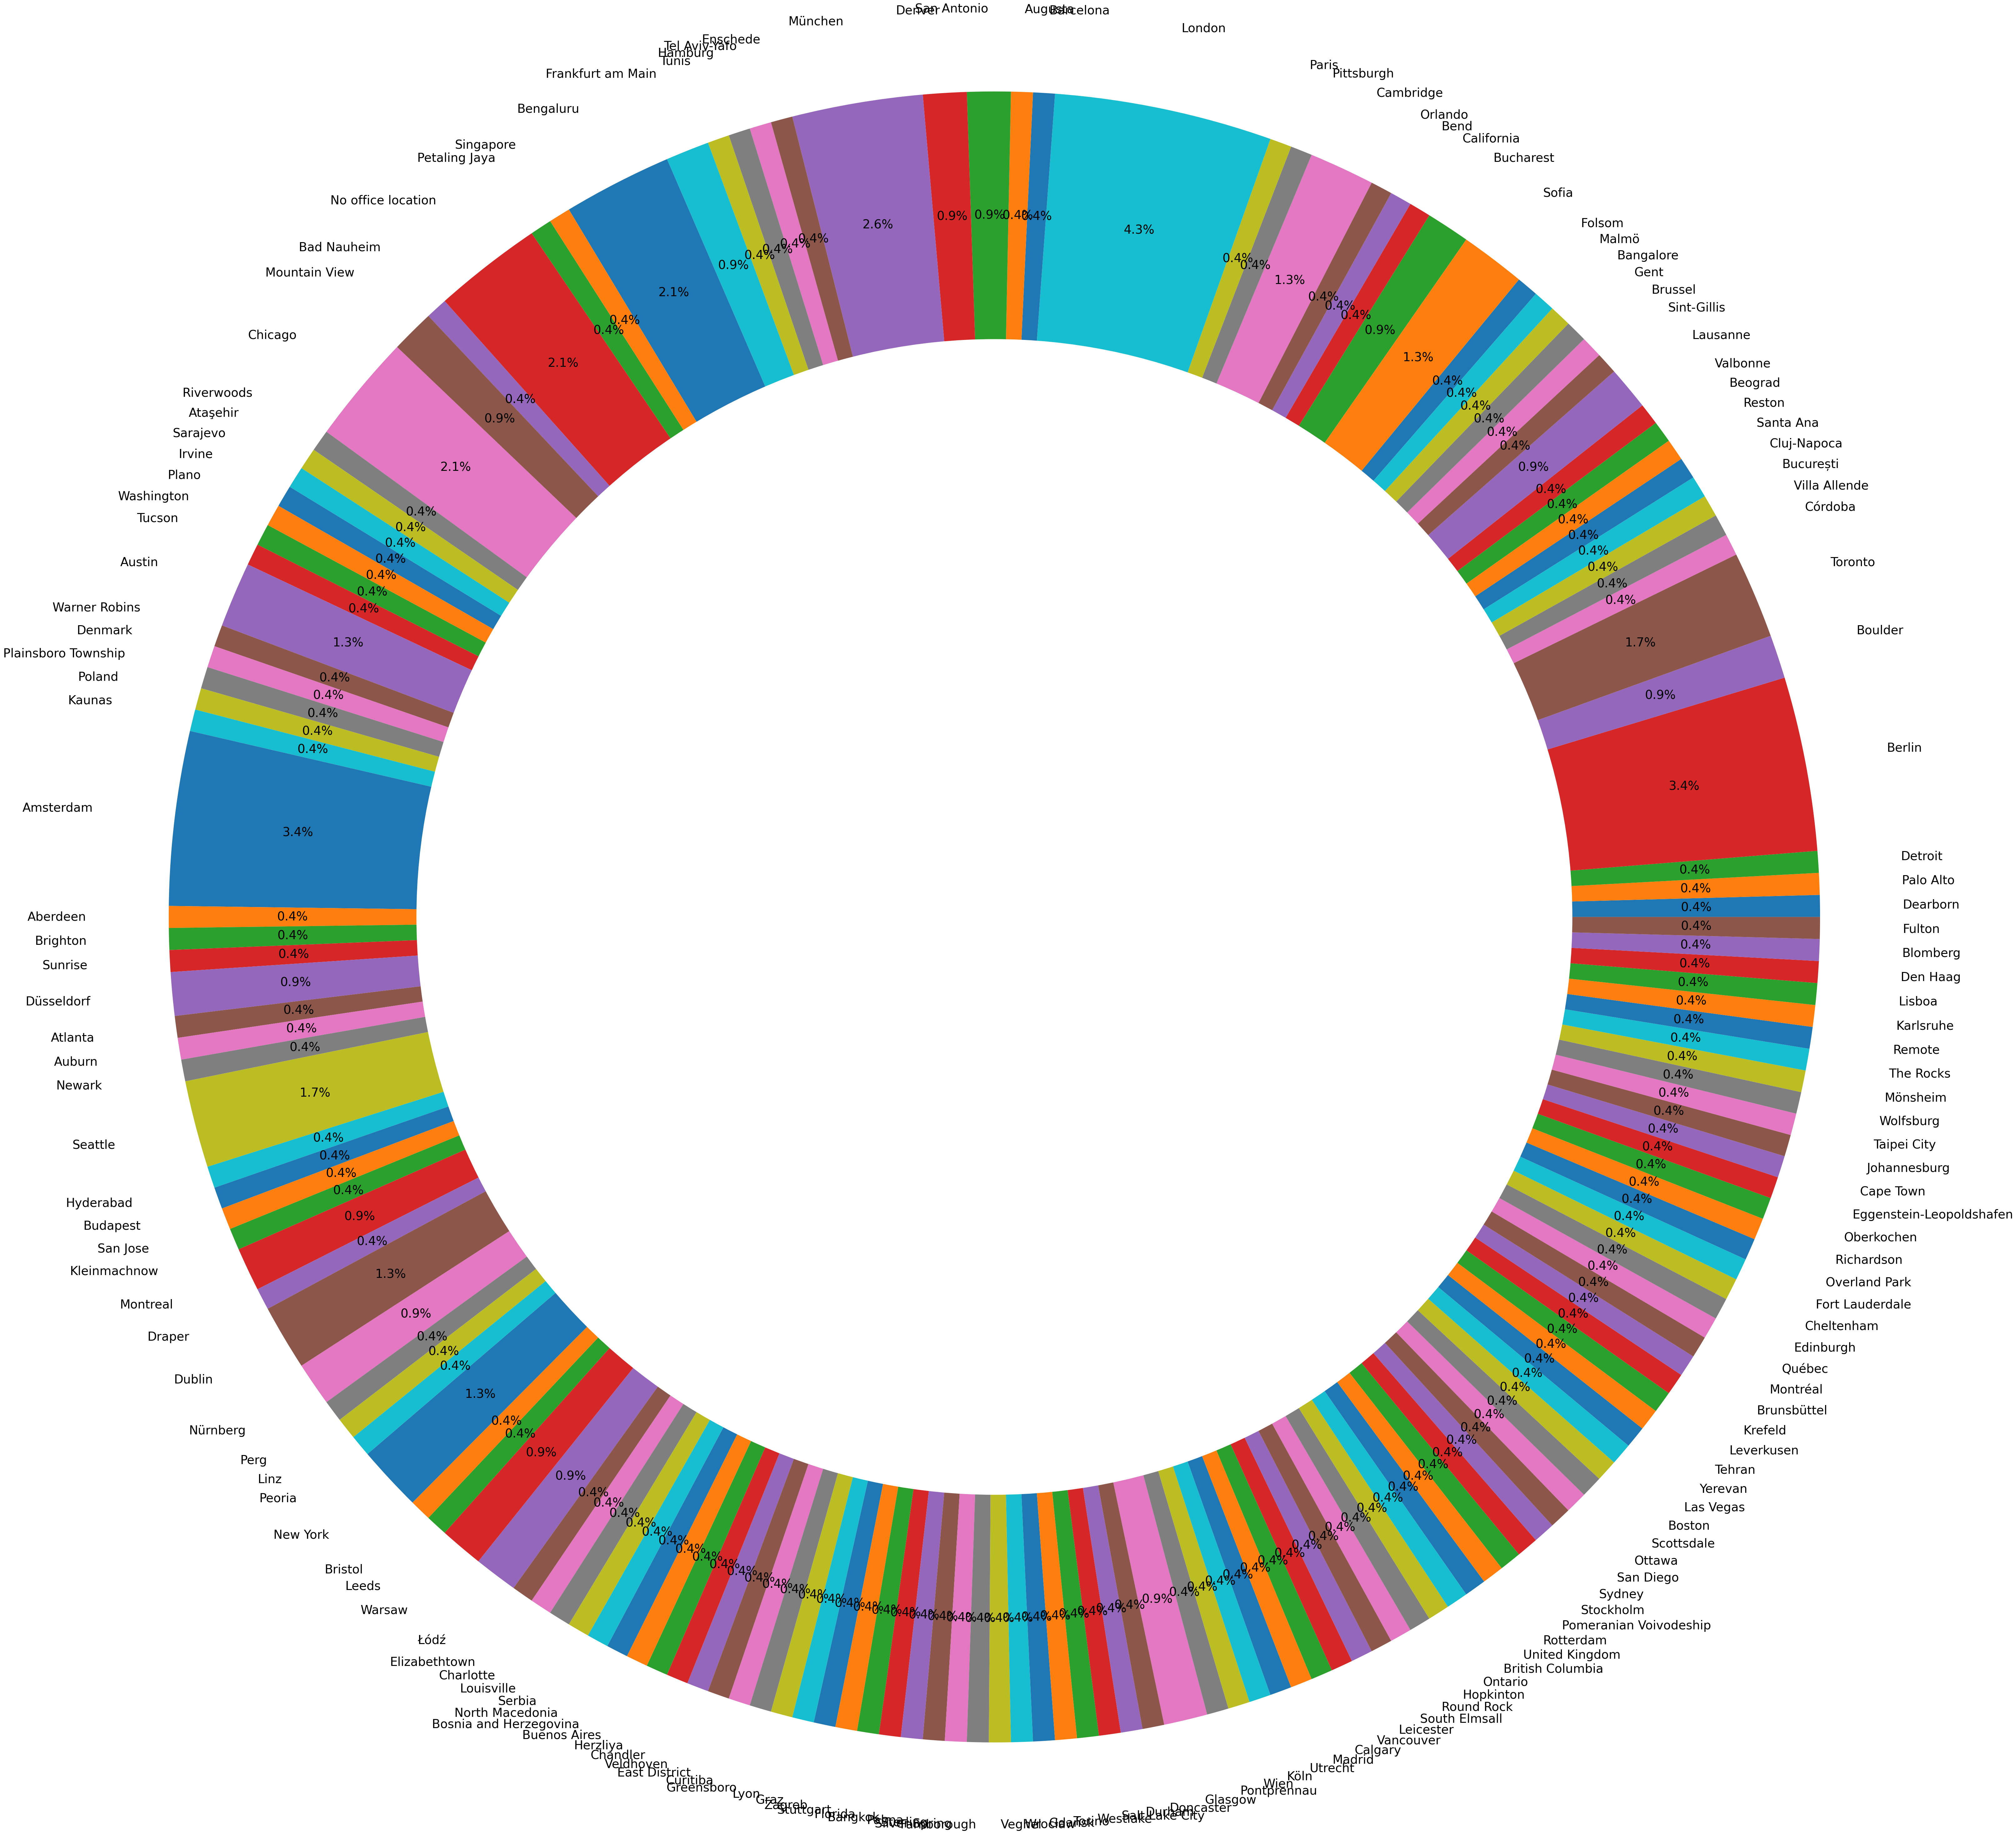

In [199]:
# Crear el diagrama de donas
fig, ax = plt.subplots()
ax.pie(dataFrameCiudades['PORTION_PERCENT'], labels=dataFrameCiudades.index, autopct='%1.1f%%', pctdistance=0.85)
ax.axis('equal')  # Hacer que el gráfico sea un círculo

# Dibuja el circulo interno
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Para darle un tamaño específico a la figura
fig.set_size_inches(75,75)

# Modificar tamaño de fuente de los labels
for text in ax.texts:
    text.set_fontsize(28)

# Mostrar el diagrama
plt.show()

### Creacion del Dataframe (tabla) para identificar las frecuencias de ciudades - Ordenado

In [186]:
# DIAGRAMA DE PIE
dataFrameCiudades = pd.DataFrame(list(dictCiudades.items()))
dataFrameCiudades.columns = ["CIUDAD", "FRECUENCIA"]
dataFrameCiudades['PORTION_PERCENT'] = dataFrameCiudades['FRECUENCIA']/dataFrameCiudades['FRECUENCIA'].sum()*100
dataFrameCiudadesSorted = dataFrameCiudades.drop_duplicates().sort_values(by="FRECUENCIA", ascending=False)
dataFrameCiudadesSorted.index = dataFrameCiudadesSorted["CIUDAD"]
del dataFrameCiudadesSorted["CIUDAD"]
dataFrameCiudadesSorted.head(15)

FRECUENCIA  PORTION_PERCENT
CIUDAD                                         
London                      10         4.255319
Berlin                       8         3.404255
Amsterdam                    8         3.404255
München                      6         2.553191
No office location           5         2.127660
Bengaluru                    5         2.127660
Chicago                      5         2.127660
Toronto                      4         1.702128
Seattle                      4         1.702128
Cambridge                    3         1.276596
Dublin                       3         1.276596
New York                     3         1.276596
Sofia                        3         1.276596
Austin                       3         1.276596
Frankfurt am Main            2         0.851064

### Diagrama de donas Ordenado - Completo

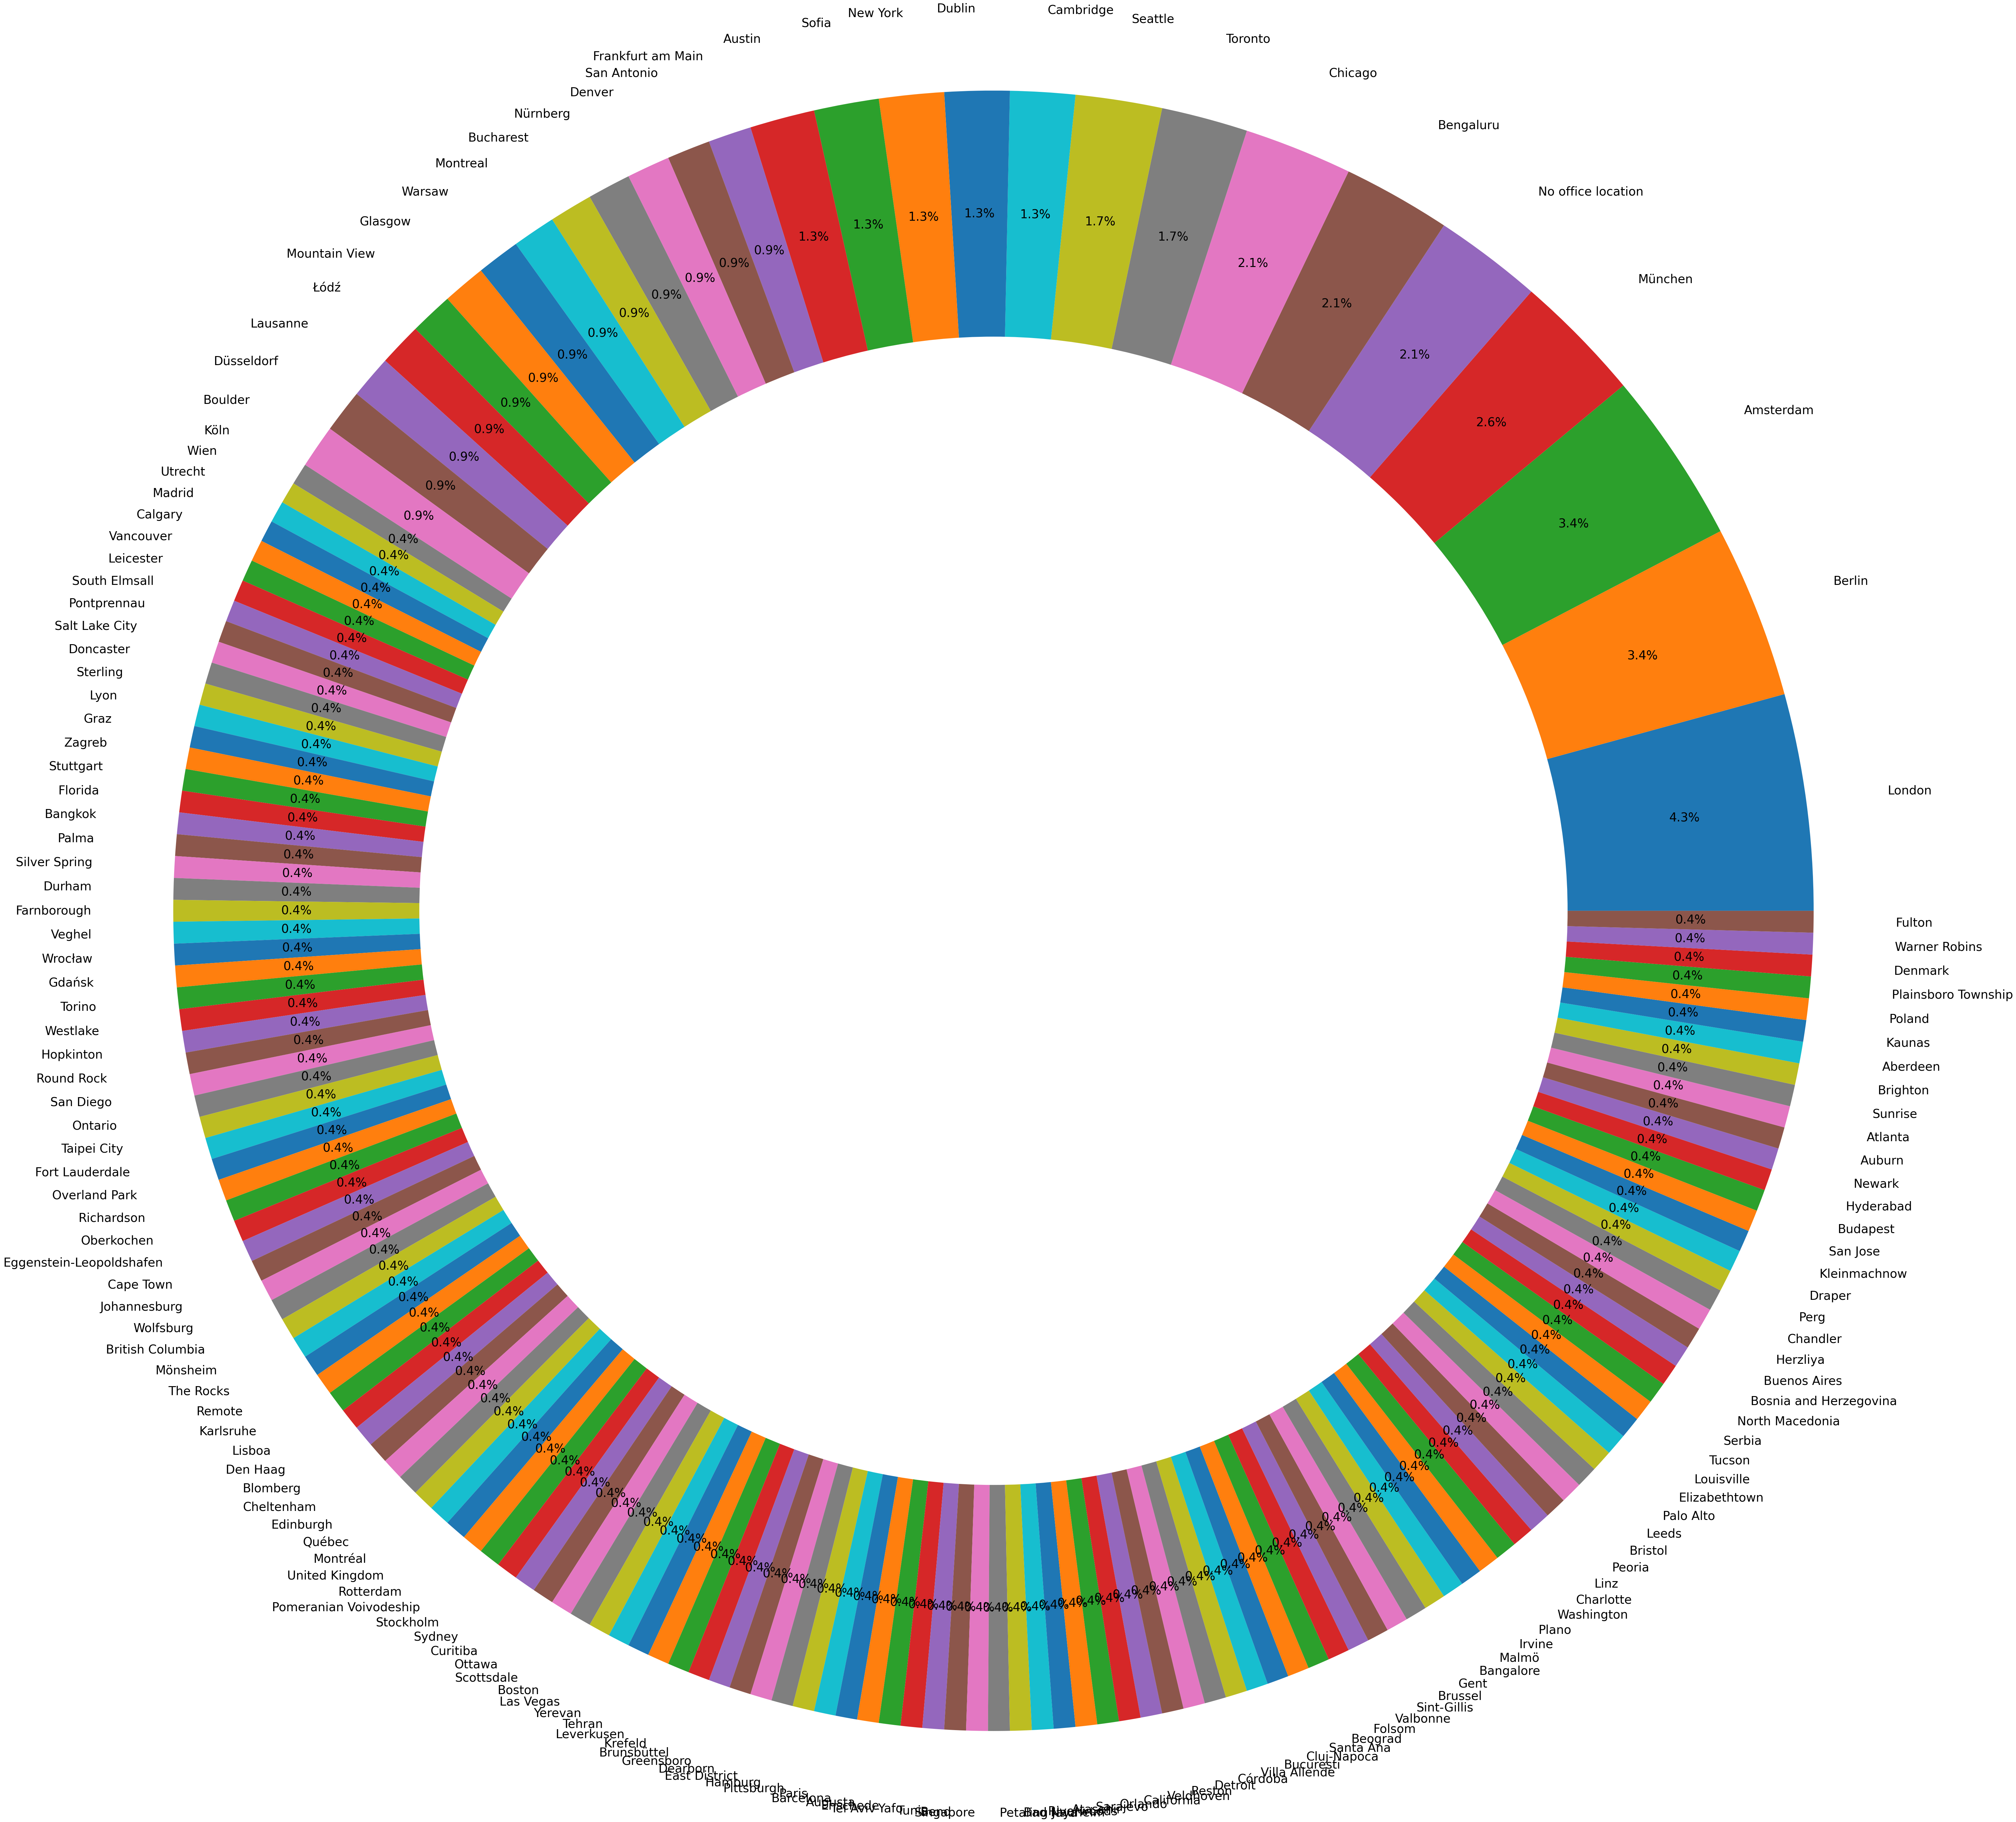

In [188]:
# Crear el diagrama de donas
fig, ax = plt.subplots()
ax.pie(dataFrameCiudadesSorted['PORTION_PERCENT'], labels=dataFrameCiudadesSorted.index, autopct='%1.1f%%', pctdistance=0.85)
ax.axis('equal')  # Hacer que el gráfico sea un círculo

# Dibuja el circulo interno
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Para darle un tamaño específico a la figura
fig.set_size_inches(75,75)

# Modificar tamaño de fuente de los labels
for text in ax.texts:
    text.set_fontsize(28)

# Mostrar el diagrama
plt.show()